<a href="https://colab.research.google.com/github/pravincoder/Fundamentals_tensorflow/blob/main/Tensorflow_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network Classification with TensorFlow
In this notebook we're going to learn how to write neural network for           Classification Problems.


## Classification Problem:-

* `Email`-'Spam' or 'Not Spam' a perfect example of **Binary classification**.

* `ImageClassification` - like 'Cat' , 'Dog' and 'Person' etc is called **Multiclass Classification**.

* `TagsPrediction` - in a wikipedia page "what tags should this page include?" is called **MultiLabel Classification**. 

In [ ]:
# Creating data to view and fit
from  sklearn .datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,noise=0.03,random_state=42)


In [ ]:
# Check features amd labels
X[:5], y[:5]


(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

#### **Note-** As the given label only include (1,0) this is a binary classification problem

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1]})
circles

,X0,X1
0,0.754246,0.231481
1,-0.756159,0.153259
2,-0.815392,0.173282
3,-0.393731,0.692883
4,0.442208,-0.896723
...,...,...
995,0.244054,0.944125
996,-0.978655,-0.272373
997,-0.136900,-0.810012
998,0.670362,-0.767502


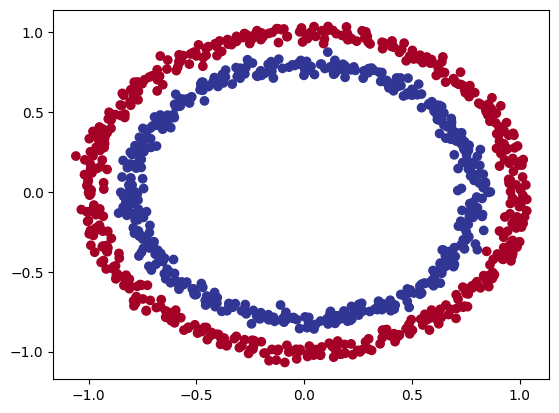

In [ ]:
# Visualise the dataframe
import matplotlib.pyplot as plt
plt.scatter(circles['X0'],circles['X1'],c=y,cmap=plt.cm.RdYlBu)

### **Exercise-** we have to create a model that predicts the color of the given point of the cirle as shown above red='1' and blue='0'

## Input  & Output shapes

In [ ]:
# Input shape(Features)
X.shape

(1000, 2)

In [ ]:
# Output Shape (Labels)
y.shape


(1000,)

## BinaryClassification Model Creation


Epoch 1/100
32/32 [==============================] - 6s 12ms/step - loss: 0.6922 - accuracy: 0.4970
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6882 - accuracy: 0.5140
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6839 - accuracy: 0.5520
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6786 - accuracy: 0.5900
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6721 - accuracy: 0.5180
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6649 - accuracy: 0.5230
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6571 - accuracy: 0.9060
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6473 - accuracy: 0.7120
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6363 - accuracy: 0.8210
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6230 - accuracy: 0.8090
Epoch 11

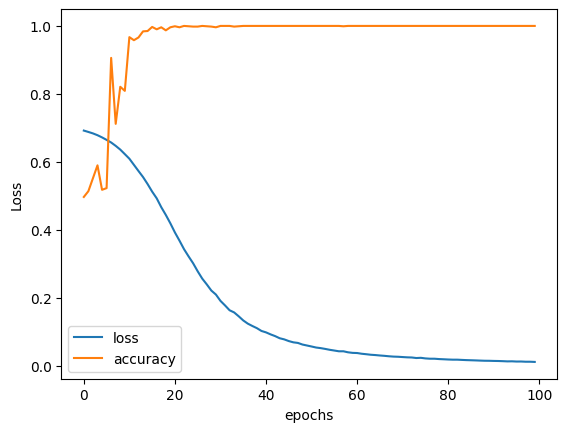

In [ ]:

import tensorflow as tf
# Model random seed
tf.random.set_seed(42)

# Model layers
B_Model = tf.keras.Sequential([tf.keras.layers.Input(shape=(2,),name='Input_layer'),
                               tf.keras.layers.Dense(100,activation='relu',name='D1'),
                               tf.keras.layers.Dense(2,activation='relu',name='D2'),
                               tf.keras.layers.Dense(1,activation='sigmoid',name='Output_layer')],name = 'BinaryClassification_Model') 
B_Model.compile(loss='BinaryCrossentropy',optimizer='Adam',metrics='accuracy')

# Fit the Model
history = B_Model.fit(circles,y,epochs=100)
# Visualize loss
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.show()


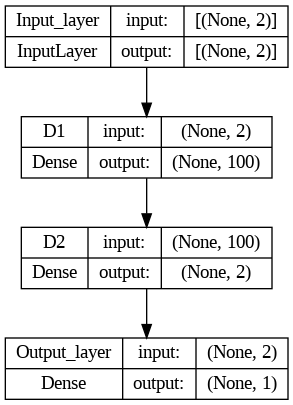

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(B_Model,show_shapes=True)

In [ ]:
# Evaluate model
B_Model.evaluate(X,y)

32/32 [==============================] - 1s 4ms/step - loss: 0.0112 - accuracy: 1.0000


[0.01121558342128992, 1.0]

To visualize  our Model's predictions, let's create a function `plot_desision_boundary()` this function will :-
* Take in a Trained Model ,features (X) and labels (y).
* Create a meshgrid of different X values.
* Make predictions across the Meshgrid
* Plot the predictions as well as a line btw zones(where each unique class falls).


In [ ]:
import numpy as np
def plot_decision_boundary(model,X,y):
  """ Plots the decision boundary by the model predicting on X """
  # Define the asis boundaries of the plot and create a meshgrid
  x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))
  # Create X value(we're going to make prediction on these)
  x_in =np.c_[xx.ravel(),yy.ravel()] # stack 2d array in one array

  #make Prediction
  y_pred = model.predict(x_in)

  #check for multi-class problem
  if  len(y_pred[0])>1:
    print("Doing Multiclass Classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("Doing binary Classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  #Plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu ,alpha =0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())




313/313 [==============================] - 1s 3ms/step
Doing binary Classification


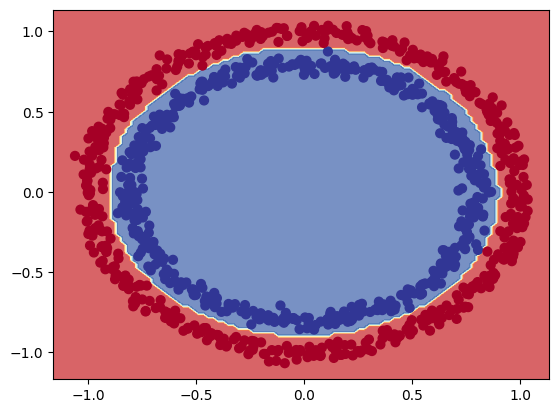

In [ ]:
plot_decision_boundary(B_Model,X,y)

# Non-Linearity
**Reference before modeling-** [Tensorflow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.40569&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)


Next Model playground Accuracy:-[All parameters are set](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.40569&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [ ]:
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
# lets create a model  after check it in playground same as the set parameters
# Random Seed
tf.random.set_seed(42)
# layering
model_1= tf.keras.Sequential([tf.keras.layers.Input(shape=(2,)),
                              tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                              tf.keras.layers.Dense(2,activation=tf.keras.activations.relu),
                              tf.keras.layers.Dense(1,activation='sigmoid')                           
])
#compiling
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

#fitting
history = model_1.fit(X,y,epochs=115)

Epoch 1/115
32/32 [==============================] - 3s 4ms/step - loss: 0.6922 - accuracy: 0.5130
Epoch 2/115
32/32 [==============================] - 0s 6ms/step - loss: 0.6866 - accuracy: 0.5440
Epoch 3/115
32/32 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.6060
Epoch 4/115
32/32 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.6880
Epoch 5/115
32/32 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.7820
Epoch 6/115
32/32 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.8330
Epoch 7/115
32/32 [==============================] - 0s 3ms/step - loss: 0.3930 - accuracy: 0.8550
Epoch 8/115
32/32 [==============================] - 0s 3ms/step - loss: 0.3647 - accuracy: 0.8650
Epoch 9/115
32/32 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.8960
Epoch 10/115
32/32 [==============================] - 0s 2ms/step - loss: 0.2873 - accuracy: 0.9090
Epoch 11/

<Axes: >

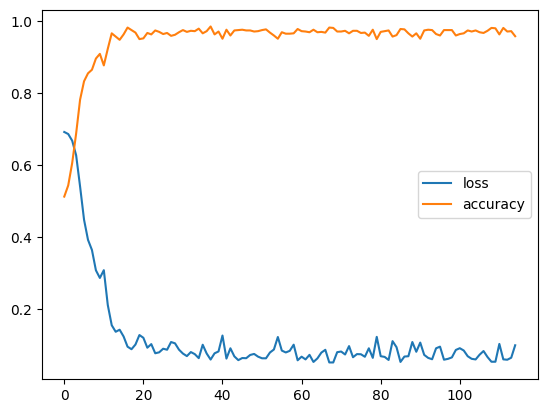

In [ ]:
pd.DataFrame(history.history).plot()

313/313 [==============================] - 1s 1ms/step
Doing binary Classification


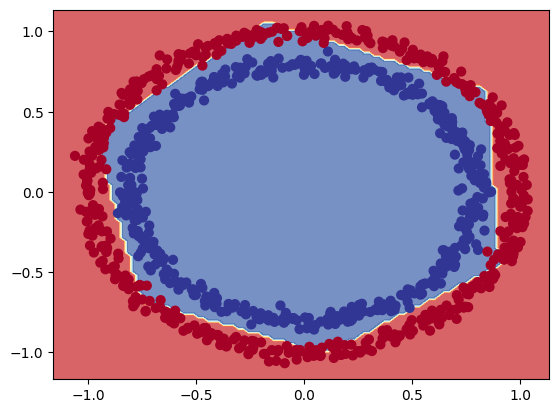

In [ ]:
#Visualize the accuracy on data
plot_decision_boundary(model_1,X,y)

In [ ]:
# Create a toy a Tensor (similar to the data into our models).
import tensorflow as tf
import matplotlib.pyplot as plt 
A = tf.cast(tf.range(-20,20,2),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-20., -18., -16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,
         2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.],
      dtype=float32)>

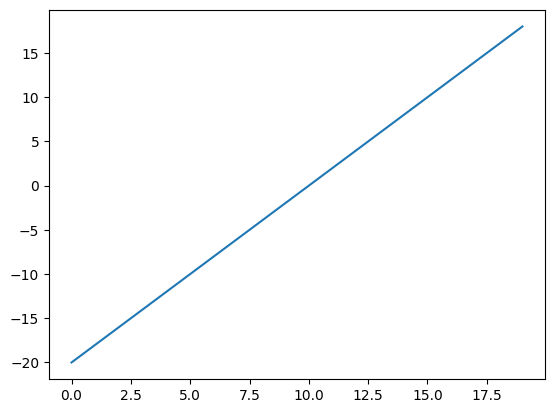

In [ ]:
#Visualize our toy tensor
plt.plot(A)

In [ ]:
# Sigmoid Function
def sigmoid(x):
  return 1/(1+tf.exp(-x))
# use the Sigmoid function
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([2.0611537e-09, 1.5229981e-08, 1.1253517e-07, 8.3152804e-07,
       6.1441751e-06, 4.5397872e-05, 3.3535014e-04, 2.4726233e-03,
       1.7986210e-02, 1.1920292e-01, 5.0000000e-01, 8.8079703e-01,
       9.8201376e-01, 9.9752742e-01, 9.9966466e-01, 9.9995458e-01,
       9.9999380e-01, 9.9999917e-01, 9.9999988e-01, 1.0000000e+00],
      dtype=float32)>

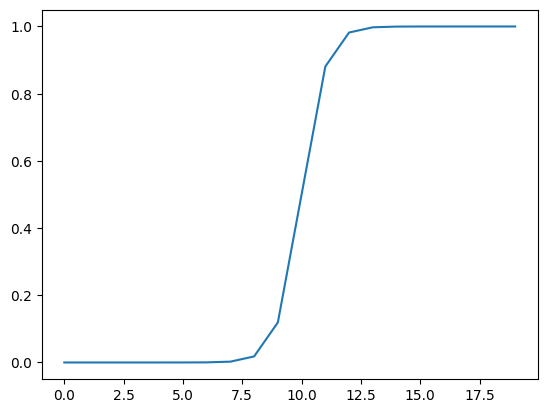

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [ ]:
# LEts create a relu function
def relu(x):
  return tf.maximum(0,x)

# pass toy tensor to custom relu function
relu(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  4.,
        6.,  8., 10., 12., 14., 16., 18.], dtype=float32)>

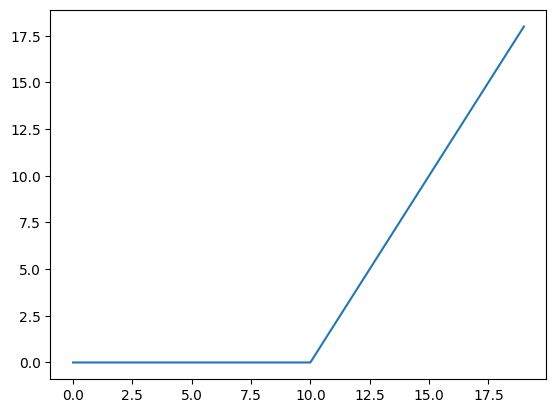

In [ ]:
plt.plot(relu(A))

## Evaluating and improving our classification model

Till now we're training and testing on the same dataset ... 
However in ML this is a sin/blunder.
So lets create a test and train sets.


In [ ]:
# Check len of sample in circle data
len(X)

1000

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Split into train(80%) and test(20%)
X_train,y_train=X[:800],y[:800]
X_test,y_test=X[800:],y[800:]
#Check Shape
(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

((800, 2), (800,), (200, 2), (200,))

In [ ]:
# Recreate a model on train data and evaluate on test data
# Set seed 
tf.random.set_seed(42)

# MOdel 
model_2 = tf.keras.Sequential([tf.keras.layers.Input(shape=(2,)),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(10,activation='relu'),
                               tf.keras.layers.Dense(1,activation='sigmoid')
                               ],name='Model2')

#Compile
model_2.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=['accuracy'])

#fit
histroy=model_2.fit(X_train,y_train,epochs=50)


Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4863
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4900
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.4975
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5013
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5150
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5400
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5375
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5575
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6812 - accuracy: 0.5738
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.5750
Epoch 11/50
25/25 [

In [ ]:
B_Model.summary()

Model: "BinaryClassification_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 D1 (Dense)                  (None, 100)               300       
                                                                 
 D2 (Dense)                  (None, 2)                 202       
                                                                 
 Output_layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 505
Trainable params: 505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Evaluate MOdel
model_2.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1682 - accuracy: 1.0000


[0.16820335388183594, 1.0]

313/313 [==============================] - 0s 1ms/step
Doing binary Classification
313/313 [==============================] - 1s 2ms/step
Doing binary Classification


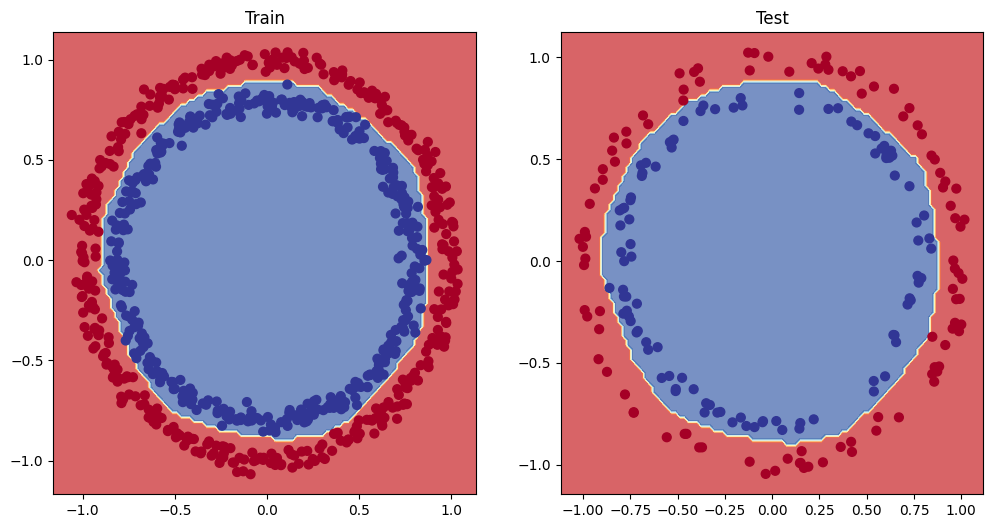

In [ ]:
#Plot the decision boundary for trqin and test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1) # (rows,colm,1st val)
plt.title('Train')
plot_decision_boundary(model_2,X_train,y_train)
plt.subplot(1,2,2) # (rows,colm,2nd val)
plt.title('Test')
plot_decision_boundary(model_2,X_test,y_test)
plt.show()

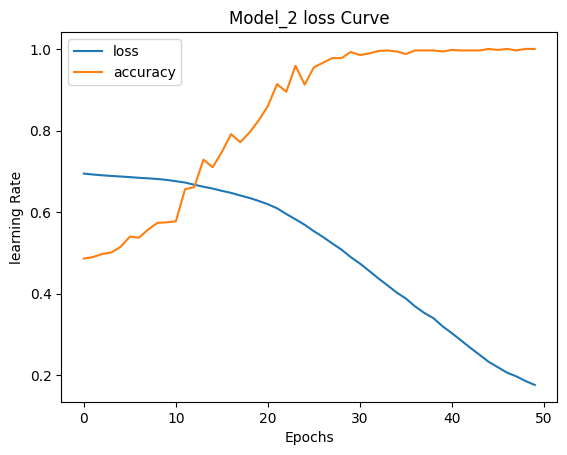

In [ ]:
# Check Histroy of model
pd.DataFrame(histroy.history).plot() # 
plt.title('Model_2 loss Curve');
plt.xlabel('Epochs');
plt.ylabel('learning Rate');

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during Training ) we're going to use the following steps:
* A learning Rate **CallBack**(add extra functionality to your model *while Training*)
* Another model (we could use the same one as above or get variation's)
* A modified Loss curve

In [55]:

# Set seed 
tf.random.set_seed(42)

# MOdel 
model_3 = tf.keras.Sequential([tf.keras.layers.Input(shape=(2,)),
                               tf.keras.layers.Dense(4,activation='relu'),
                               tf.keras.layers.Dense(4,activation='relu'),
                               tf.keras.layers.Dense(1,activation='sigmoid')
                               ],name='Model2')

#Compile
model_3.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

#Create a learning rate Callback
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

#fit
histroy=model_3.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])



Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7096 - accuracy: 0.4950 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7086 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7074 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7063 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7052 - accuracy: 0.4925 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7040 - accuracy: 0.4900 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7028 - accuracy: 0.4900 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 8ms/step - loss: 0.7017 - accuracy: 0.4925 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 8ms/step - loss:

<Axes: xlabel='Epochs', ylabel='Lr Count'>

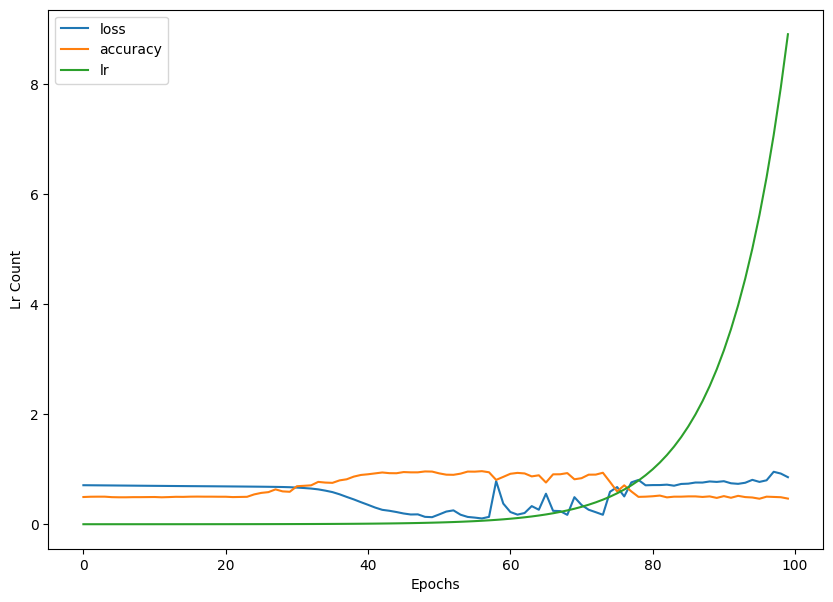

In [56]:
pd.DataFrame(histroy.history).plot(figsize=(10,7),xlabel="Epochs",ylabel='Lr Count')

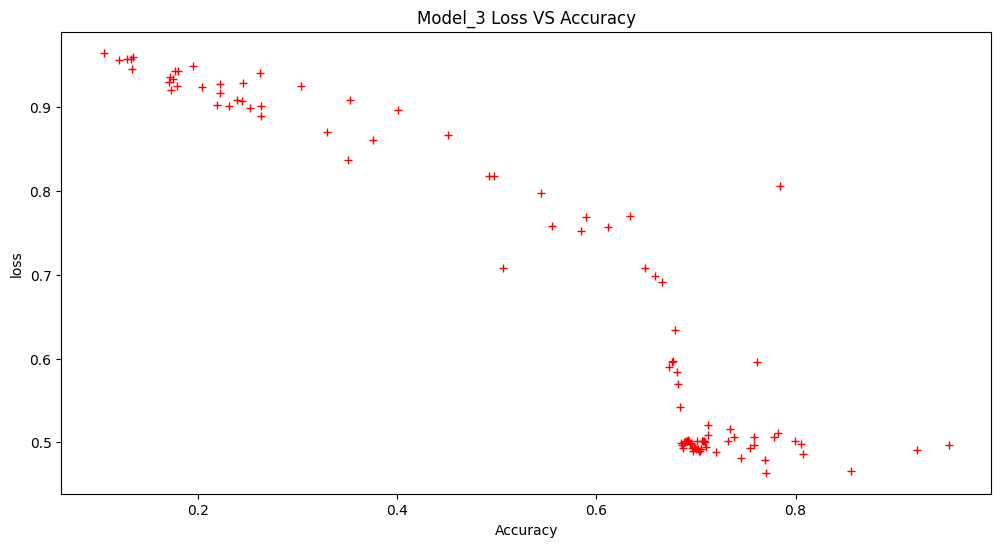

In [70]:
# Just plot a graph of Acc vs loss
model_3loss=histroy.history['loss']
model_3acc=histroy.history['accuracy']
plt.figure(figsize=(12,6))
plt.title('Model_3 Loss VS Accuracy');
plt.plot(model_3loss,model_3acc,'r+');
plt.xlabel("Accuracy");
plt.ylabel('loss');

In [66]:
len(model_3loss),len(model_3acc)

(100, 115)